<a href="https://colab.research.google.com/github/ashleynguyen04/DS3001-Project/blob/main/project_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DS 3001 Final Project: What individuals are most at risk of developing diabetes based on their health indicators?**

Ashley Nguyen (rhw9tv), Ahmed Ahmed (pzs2vx), and Sanket Doddabendigere (kfr9mc)

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


dataset = 'https://raw.githubusercontent.com/ashleynguyen04/DS3001-Project/refs/heads/main/diabetes_binary_health_indicators_BRFSS2015.csv'
df = pd.read_csv(dataset)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


**Model**

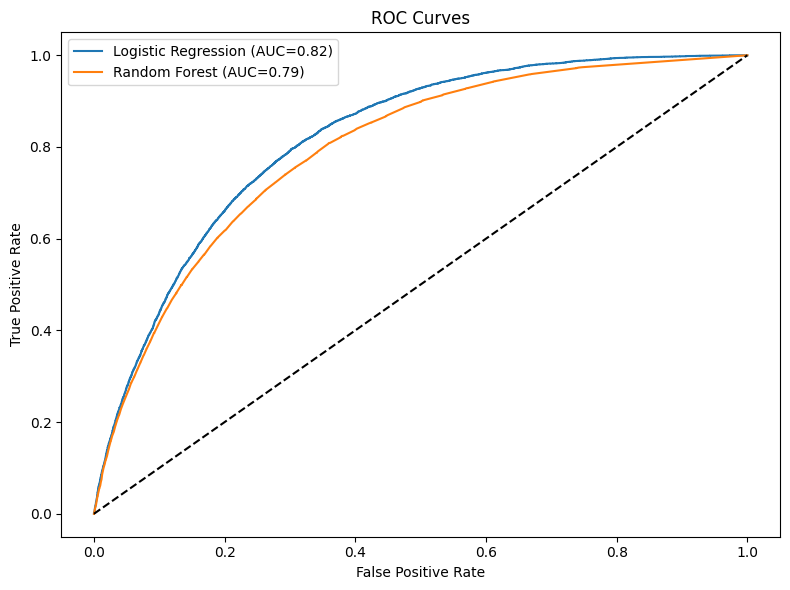

--- Logistic Regression ---
Accuracy : 0.862
Precision: 0.516
Recall   : 0.158
F1-score : 0.242
ROC-AUC  : 0.819



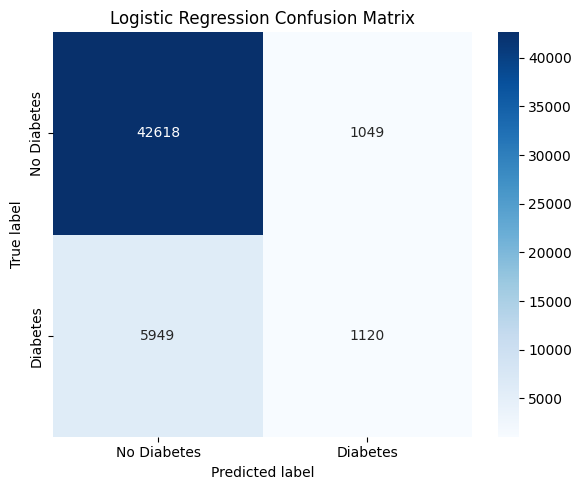

--- Random Forest ---
Accuracy : 0.859
Precision: 0.488
Recall   : 0.179
F1-score : 0.262
ROC-AUC  : 0.795



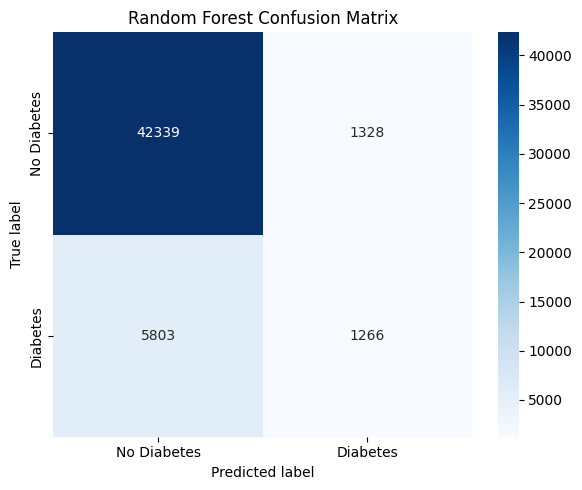

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)

df = df.dropna()
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest':       RandomForestClassifier(n_estimators=100, random_state=42),
}


results = {}
plt.figure(figsize=(8,6))

for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:,1]
    # Metrics
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)
    results[name] = dict(accuracy=acc, precision=prec, recall=rec, f1=f1, roc_auc=auc)
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.2f})')

# 8. Plot ROC
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.tight_layout()
plt.show()

for name, mets in results.items():
    print(f'--- {name} ---')
    print(f"Accuracy : {mets['accuracy']:.3f}")
    print(f"Precision: {mets['precision']:.3f}")
    print(f"Recall   : {mets['recall']:.3f}")
    print(f"F1-score : {mets['f1']:.3f}")
    print(f"ROC-AUC  : {mets['roc_auc']:.3f}")
    print()

    class_names = ['No Diabetes', 'Diabetes']

    y_pred = models[name].predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()


--- Top 10 features for Logistic Regression (by |coef|) ---
GenHlth                 0.572123
BMI                     0.408496
Age                     0.382014
HighBP                  0.374478
HighChol                0.286623
CholCheck               0.237583
HvyAlcoholConsump       0.182093
Sex                     0.125806
Income                  0.105428
HeartDiseaseorAttack    0.065441
dtype: float64


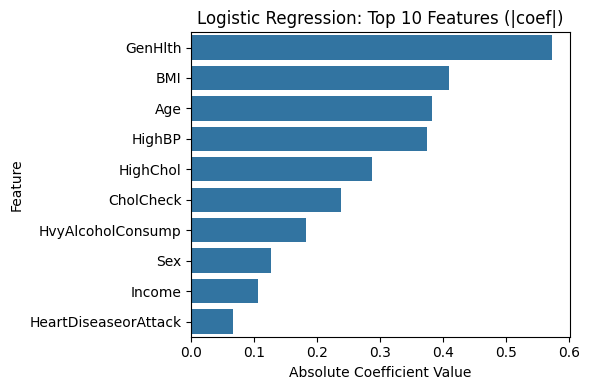

--- Top 10 features for Random Forest ---
BMI          0.184123
Age          0.122429
Income       0.098747
PhysHlth     0.084610
Education    0.070320
GenHlth      0.070139
MentHlth     0.064511
HighBP       0.042603
Fruits       0.033205
Smoker       0.033193
dtype: float64


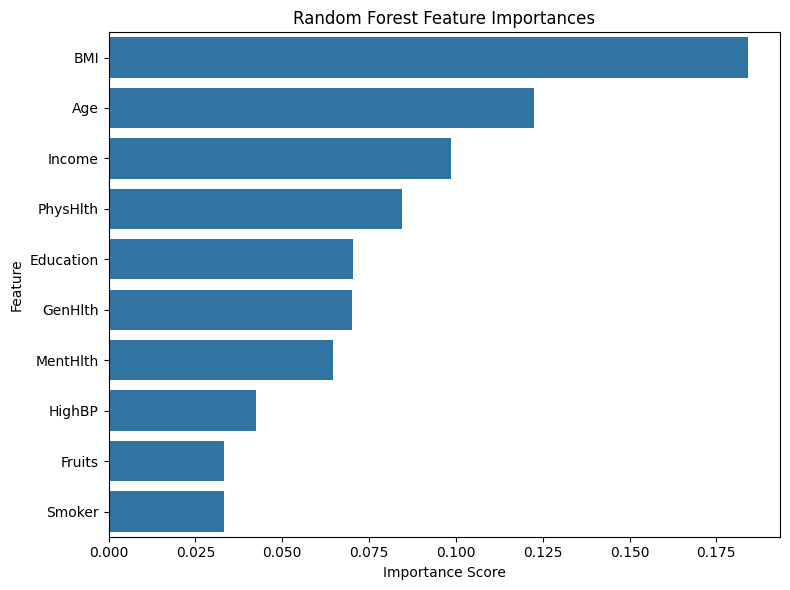

In [9]:
if 'Logistic Regression' in models:
    lr = models['Logistic Regression']
    coefs = lr.coef_[0]
    feat_coefs = pd.Series(coefs, index=X.columns)
    top10_lr = feat_coefs.abs().sort_values(ascending=False).head(10)
    
    print('--- Top 10 features for Logistic Regression (by |coef|) ---')
    print(top10_lr)
    plt.figure(figsize=(6,4))
    sns.barplot(x=top10_lr.values, y=top10_lr.index)
    plt.title('Logistic Regression: Top 10 Features (|coef|)')
    plt.xlabel('Absolute Coefficient Value')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


for name in ['Random Forest']:
    if name in models:
        imp = models[name].feature_importances_
        feat_imp = pd.Series(imp, index=X.columns).sort_values(ascending=False).head(10)
        print(f'--- Top 10 features for {name} ---')
        print(feat_imp)
        
        plt.figure(figsize=(8, 6))
        sns.barplot(x=feat_imp.values, y=feat_imp.index)
        plt.title(f'{name} Feature Importances')
        plt.xlabel('Importance Score')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()